# Churn Modeling & Evaluation <br><small>with Accuracy, Precision, Recall, and Confusion Matrices</small>
**by David Cochran**<br/>
**Data Analytics @ Newman University**

**Data:** [Churn-Modelling - Kaggle](https://www.kaggle.com/shubh0799/churn-modelling)

**This Notebook:** This is crafted as a demonstration of a standard machine learning training and testing process.

**Contents:**
1. Read and Review Data
2. Prepare Data Splits
3. Fit Models
4. Test Models
5. Assess Models

In [1]:
# Essential Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from time import time

# Libraries for Machine Learning Process
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, confusion_matrix

# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
# Customize seaborn plot styles
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook', font_scale = 0.8)
sns.set_style('ticks')
plt.rc('axes.spines', top=False, right=False, left=False, bottom=False)

# Colors for plots
blue = 'skyblue' 
orange = 'orange'
cp1 = [blue, orange]

# cp2 Palette - Reversed binary color order when needed for certain plots
cp2 = [orange, blue]

# cp5 Palette - 5 colors for use with categorical data
turquoise = 'mediumaquamarine'
salmon = 'darksalmon'
tan = 'tan'
gray = 'gainsboro'
cp5 = [blue, turquoise, salmon, tan, gray]

# cpd Palette - blue-to-orange diverging palette for correlation heatmaps
cpd = sns.diverging_palette(242, 39, s=100, l=65, n=11)

# Set the default palette
sns.set_palette(cp1)

# 1. Read and Review Data

This data has been cleaned in a previous EDA and preparation process.

In [3]:
# Read cleaned version of the data
df = pd.read_csv('data/churn_cleaned.csv')
df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,1,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,1,1,43,2,125510.82,1,1,1,79084.10,0
5,645,1,0,44,8,113755.78,2,1,0,149756.71,1
6,822,0,0,50,7,0.00,2,1,1,10062.80,0
7,376,2,1,29,4,115046.74,4,1,0,119346.88,1
8,501,0,0,44,4,142051.07,2,0,1,74940.50,0
9,684,0,0,27,2,134603.88,1,1,1,71725.73,0


In [4]:
# Dataframe fundamental info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


# 2. Prepare Data Splits

In [5]:
# features — all columns except target variable
features = df.drop('Exited', axis=1)

# labels — only the target variable column
labels = df['Exited']

In [6]:
# Create Train and Test Splits
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Report Number and Proportion of Train and Test Features and Labels
print(f'Train Split: {X_train.shape[0]} Records, {len(y_train)} Labels = {round(len(y_train)/len(labels), 4) * 100}%')
print(f'Test Split: {X_test.shape[0]} Records, {len(y_test)} Labels = {round(len(y_test)/len(labels), 4) * 100}%')

Train Split: 8000 Records, 8000 Labels = 80.0%
Test Split: 2000 Records, 2000 Labels = 20.0%


# 3. Train Models

In [7]:
# Define a models list
models = [
          LogisticRegression(),
          DecisionTreeClassifier(),
          RandomForestClassifier(),
          GradientBoostingClassifier()
          ]

# Train the models using the training features and labels
for model in models:
  model.fit(X_train, y_train)
  # Report trained model
  print(f'Trained and ready: {model}')

Trained and ready: LogisticRegression()
Trained and ready: DecisionTreeClassifier()
Trained and ready: RandomForestClassifier()
Trained and ready: GradientBoostingClassifier()


In [8]:
for model in models:
    model.fit(X_train, y_train)

# 4. Test Models

In [9]:
for model in models:
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    print(model)
    print(f'  {accuracy}')

LogisticRegression()
  80.05
DecisionTreeClassifier()
  77.8
RandomForestClassifier()
  86.7
GradientBoostingClassifier()
  86.45


# 5. Assess Models
Generate and review a report for each model, including:
- Accuracy Score
- [Precision Score](https://en.wikipedia.org/wiki/Precision_and_recall)
- [Recall Score](https://en.wikipedia.org/wiki/Precision_and_recall)
- [Confusion Matrix](https://en.wikipedia.org/wiki/Confusion_matrix)

In [10]:
# Function for generating model scores and confusion matrices with custom colors and descriptive labels

def report_scores(model, features, labels):
    '''
    Generate model scores and confusion matrices with custom colors and descriptive labels
    model = model variable
    features = features of desired split
    labels = labels of desired split
    '''
    y_pred = model.predict(features)
    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100

    cm = confusion_matrix(labels, y_pred)
    cm_norm = confusion_matrix(labels, y_pred, normalize='true')
    cm_colors = sns.color_palette(['gainsboro', 'cornflowerblue'])

    # axis labels for the confusion matrix plot
    cm_y_labels = ['0','1'] # column labels
    cm_x_labels = ['0','1'] # row labels
    
    # Confusion matrix labels
    # Review and update to match the appropriate labels for your data set
    group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
    group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in cm_norm.flatten()]
    group_labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
              zip(group_names, group_percentages, group_counts)]
    group_labels = np.asarray(group_labels).reshape(2,2)

    # Begin plot setup
    fig, ax = plt.subplots(figsize=(4.2, 4.2))

    # Heatmap
    sns.heatmap(np.eye(2), annot=group_labels, annot_kws={'size': 11}, fmt='', 
                cmap=cm_colors, cbar=False,
                yticklabels=cm_y_labels, xticklabels=cm_x_labels, ax=ax)
    
    # Axis elements
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    ax.tick_params(labelsize=10, length=0)
    ax.set_xlabel('Predicted Values', size=10)
    ax.set_ylabel('Actual Values', size=10)
    
    # Position group labels and set colors
    for text_elt, group_label in zip(ax.texts, group_labels):
        ax.text(*text_elt.get_position(), '\n', color=text_elt.get_color(),
                ha='center', va='top')

    # Title for each plot
    # Adjust pad to provide room for the score report below title and above confusion matrix plot
    plt.title(f'{model}', pad=80, loc='left', fontsize=16, fontweight='bold')

    # Score reports beneath each title
    # Adjust x and y to fit report
    plt.figtext(0.21, 0.81, f'Accuracy:  {round(accuracy, 3)}%\nPrecision:  {round(precision, 2)}%\nRecall:  {round(recall,2)}%', wrap=True, ha='left', fontsize=10) 

    # Disply the plot!
    plt.tight_layout()
    plt.subplots_adjust(left=0.2)
    print('\n') # Add a blank line for improved spacing
    plt.show()

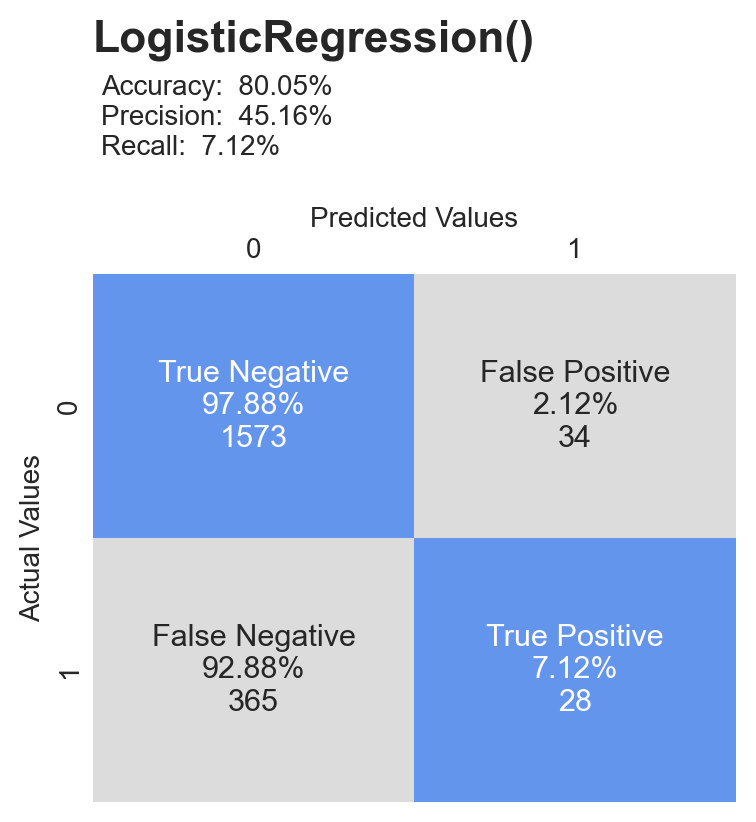

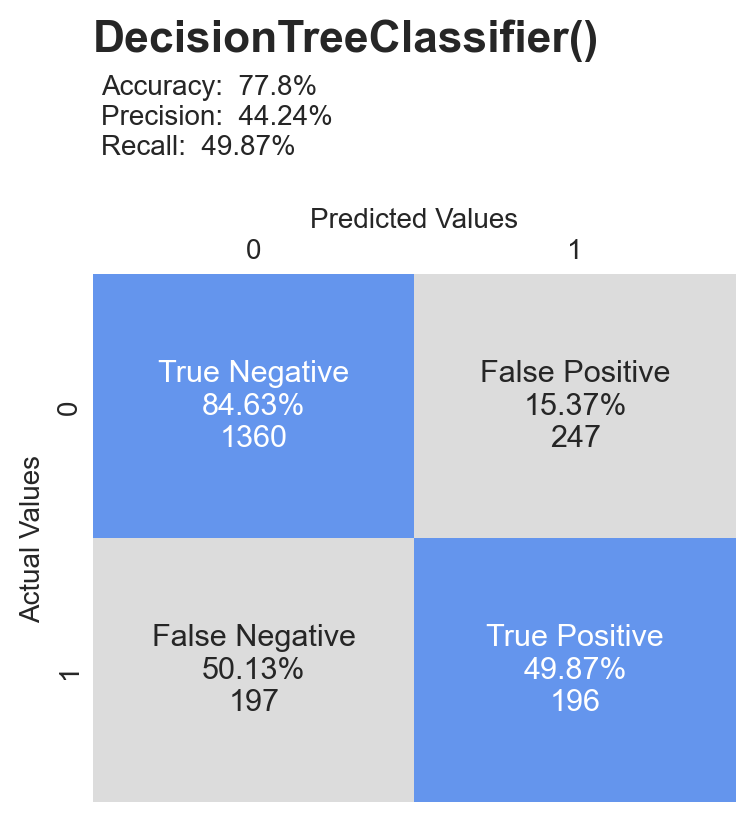

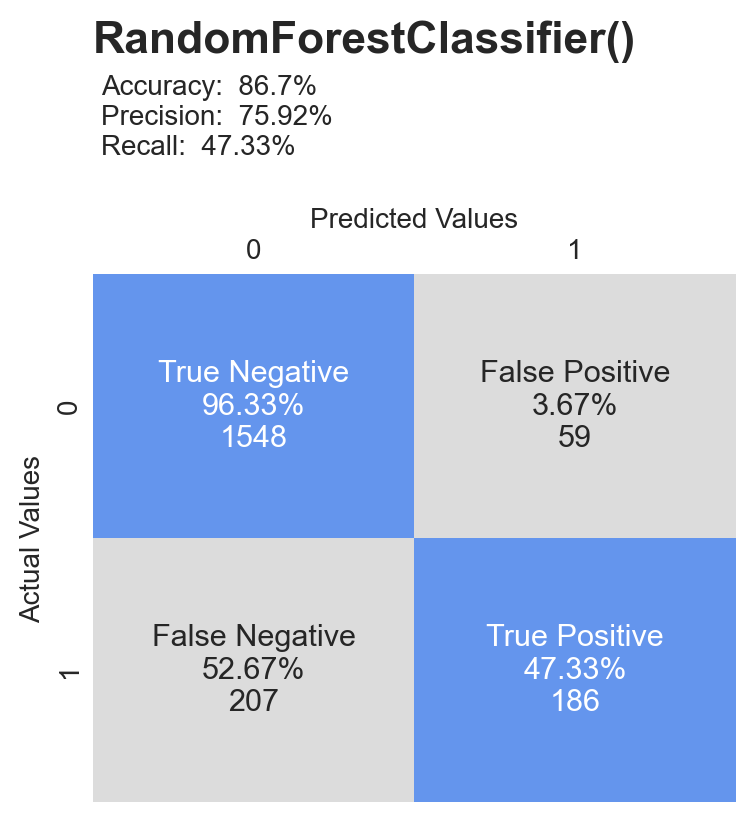

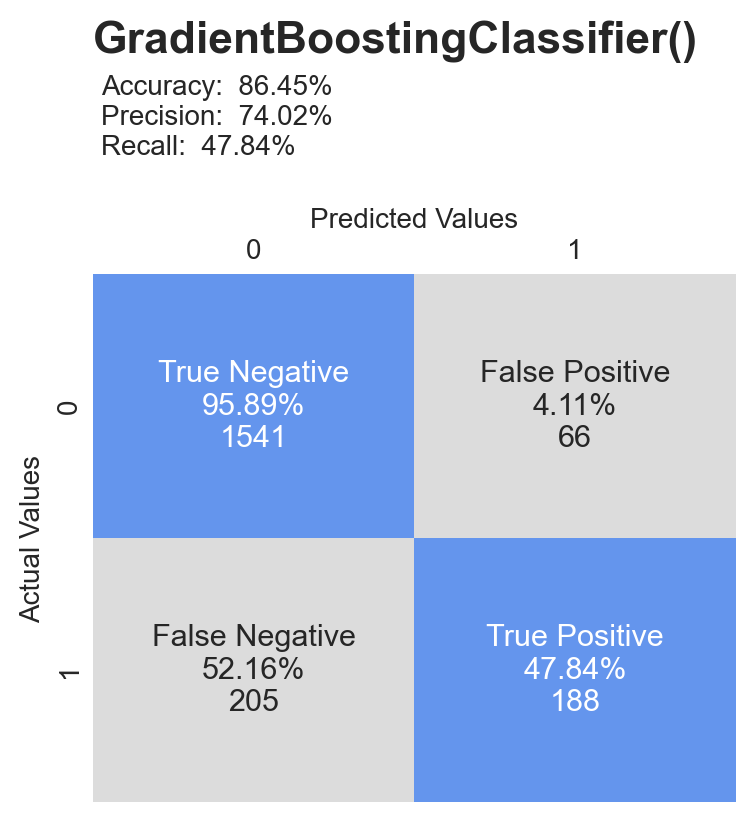

In [11]:
for model in models:
    report_scores(model, X_test, y_test)